In [2]:
import numpy as np
import datetime
import statistics #Pacote básico de estatisticas do Python
from scipy import stats # facilita a obtenção das medidas, dado que é um pacote grande
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # organiza as datas no df
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from textwrap import wrap

In [3]:
df = pd.read_excel("IPCA - %a.m..xlsx", engine="openpyxl", decimal=".",index_col=0, parse_dates=["Data"])
df2 = pd.read_excel("IPCA - 12 meses (%a.m.).xlsx", engine="openpyxl",decimal=".",index_col=0, parse_dates=["Data"])
df3 = pd.read_excel("PIB Ac. 12 meses - R$ mi.xlsx", engine="openpyxl",decimal=".",index_col=0, parse_dates=["Data"])

In [4]:
df = df.merge(df2, on = "Data") \
                    .merge(df3, on = "Data")

In [5]:
df

,IPCA - %a.m.,Acumulado,Numero indice,IPCA - 12 meses (%a.m.),PIB Ac. 12 meses - R$ mi
Data,,,,,
2003-01-01,2.25,2.250000,34.078930,14.47,1502123.5
2003-02-01,1.57,2.285325,34.613969,15.85,1522029.5
2003-03-01,1.23,2.313434,35.039721,16.57,1543732.2
2003-04-01,0.97,2.335875,35.379606,16.77,1564349.5
2003-05-01,0.61,2.350124,35.595422,17.24,1580855.1
...,...,...,...,...,...
2021-08-01,0.87,6.339099,96.013210,9.68,8335657.7
2021-09-01,1.16,6.412633,97.126963,10.25,8433106.5
2021-10-01,1.25,6.492791,98.341050,10.67,8516030.1


In [6]:
data = pd.date_range("2003-01-01", periods = 228, freq = "MS")
ipca = df["IPCA - %a.m."]
ipca12 = df["IPCA - 12 meses (%a.m.)"]
pib = df["PIB Ac. 12 meses - R$ mi"]
numero_indice = df["Numero indice"]

In [7]:
#Função para definir a distribuição de frequência, prequel para o histograma
def ac(x) :
    at = max(x) - min(x)
    k = round(np.sqrt(pd.Series.count(x)))
    h = round(at/k,2)

    return "Amplitude total = " + str(at),"N. de classes = " + str(k), "Amplitude de classes = " + str(h)


#storage em variáveis para evitar problemas com a reutilização da função
freq_ipca = ac(ipca)
freq_pib = ac(pib)

('Amplitude total = 2.63', 'N. de classes = 15', 'Amplitude de classes = 0.18') 



Text(0.5, 1.0, 'Histograma e frequencia do IPCA')

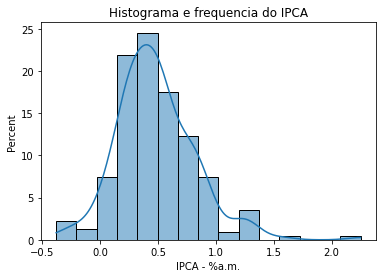

In [8]:
#Disposição dos histogramas com as distribuições, desconsiderando o ipca acumulado por ser uma variável acumulada
print(freq_ipca, "\n")

k = round(np.sqrt(pd.Series.count(ipca))) #selecionar a variável de interesse antes de rodar o gráfico

sns.histplot(x=ipca,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia do IPCA")

('Amplitude total = 7172339.6', 'N. de classes = 15', 'Amplitude de classes = 478155.97') 



Text(0.5, 1.0, 'Histograma e frequencia do PIB')

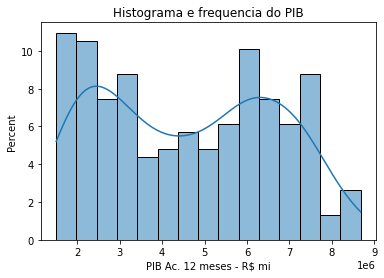

In [9]:
#Disposição dos histogramas com as distribuições, desconsiderando o ipca acumulado por ser uma variável acumulada
print(freq_pib, "\n")

k = round(np.sqrt(pd.Series.count(pib)))
sns.histplot(x=pib,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia do PIB")

Text(0.5, 1.0, 'IPCA - (%a.m.)')

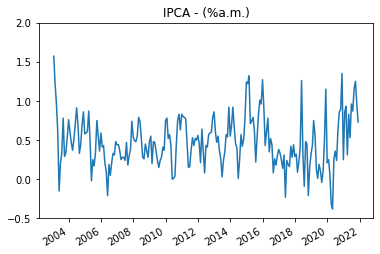

In [10]:
fig, ax = plt.subplots()

ax.plot(data[1:228],ipca[1:228], linewidth = 1.5)
ax.set(ylim=(-0.5, 2.0))
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title('IPCA - (%a.m.)')

Text(0.5, 1.0, 'IPCA Acumulada - (%a.a.)')

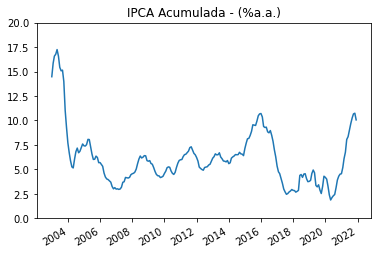

In [11]:
fig, ax = plt.subplots()

ax.plot(data[0:228],ipca12[0:228], linewidth = 1.5)
ax.set(ylim=(0.0, 20))
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title('IPCA Acumulada - (%a.a.)')

Text(0.5, 1.0, 'Evolução PIB - 2003 a 2022 em R$ trilhoes')

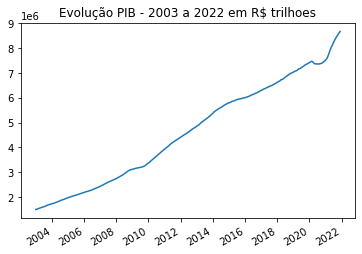

In [12]:
fig, ax = plt.subplots()

ax.plot(data,pib[0:228], linewidth = 1.5)
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title("Evolução PIB - 2003 a 2022 em R$ trilhoes")

In [13]:
pib_desc = pib.describe() # Por ser uma função, não houve forma de traduzir as variáveis.
gmean_pib = "Média geométrica: " + str(round(statistics.geometric_mean(pib),2))
median_pib = "Mediana: " + str(statistics.median(pib))
var_pib = "Variancia: " + str(statistics.variance(pib))
ermed_pib = "Erro Padrão da Média: " + str(stats.mstats.sem(pib))
assim_pib = "Assimetria: " + str(stats.skew(pib)) # onde se concentra o peso maior da distribuição

# Teste de JARQUE-BERA, usando função de resposta para o resultado do teste.

print(gmean_pib + "\n" + median_pib + "\n" + ermed_pib + "\n" + var_pib + "\n" + assim_pib)
print("\n")

# Apresentando os resultados obtidos
round(pib_desc,2)

Média geométrica: 4110397.85
Mediana: 4606582.65
Erro Padrão da Média: 135512.64172720484
Variancia: 4186918143477.958
Assimetria: 0.08226865237762636




count        228.00
mean     4612423.49
std      2046196.02
min      1502123.50
25%      2669264.58
50%      4606582.65
75%      6359105.98
max      8674463.10
Name: PIB Ac. 12 meses - R$ mi, dtype: float64

In [14]:
curtose_pib = stats.kurtosis(pib) #plotável, mas optei por não poluir mais o código
base = 3
if curtose_pib == base :
        print("Curtose = %.3f," % curtose_pib + " Mesocurtica – A distribuiçao de frequências e a propria distribuição normal")
elif curtose_pib > 3 :
        print("Curtose = %.3f," % curtose_pib + " Leptocurtica – A distribuiçao é concentrada em torno da média (alta homogeneidade)")
else:
         print("Curtose = %.3f," % curtose_pib + " Platicurtica – A distribuiçao é achatada (alta variabilidade)")

print("\n")

# Teste de JARQUE-BERA, usando função de resposta para o resultado do teste.
# Teste de normalidade dos dados
print("Teste de Jarque-Bera")
stat, p = stats.jarque_bera(pib)
print('Estatistica = %.3f, p-valor = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
else:
    print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")

print("\n"+"Teste de Shapiro")
stat,p = stats.shapiro(pib)

print('Estatistica = %.3f, p-valor = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
else:
    print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")

Curtose = -1.313, Platicurtica – A distribuiçao é achatada (alta variabilidade)


Teste de Jarque-Bera
Estatistica = 16.643, p-valor = 0.000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.937, p-valor = 0.000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


In [15]:
ipca_desc = ipca.describe() # Por ser uma função, não houve forma de traduzir as variáveis.
median_ipca = "Mediana: " + str(statistics.median(ipca))
var_ipca = "Variancia: " + str(round(statistics.variance(ipca),5))
ermed_ipca = "Erro Padrão da Média: " + str(round(stats.mstats.sem(ipca),5))
assim_ipca = "Assimetria: " + str(round(stats.skew(ipca),5)) # onde se concentra o peso maior da distribuição


print(median_ipca + "\n" + ermed_ipca + "\n" + var_ipca + "\n" + assim_ipca)
print("\n")

# Apresentando os resultados obtidos
round(ipca_desc,3)

Mediana: 0.445
Erro Padrão da Média: 0.02255
Variancia: 0.11594
Assimetria: 0.93848




count    228.000
mean       0.484
std        0.340
min       -0.380
25%        0.260
50%        0.445
75%        0.675
max        2.250
Name: IPCA - %a.m., dtype: float64

In [16]:
curtose_ipca = stats.kurtosis(ipca) #plotável, mas optei por não poluir mais o código
base = 3
if curtose_ipca == base :
    print("Curtose = %.3f," % curtose_ipca + " Mesocurtica – A distribuiçao de frequências e a propria distribuição normal")
elif curtose_pib > 3 :
    print("Curtose = %.3f," % curtose_ipca + " Leptocurtica – A distribuiçao é concentrada em torno da média (alta homogeneidade)")
else:
    print("Curtose = %.3f," % curtose_ipca + " Platicurtica – A distribuiçao é achatada (alta variabilidade)")

print("\n")

# Teste de JARQUE-BERA, usando função de resposta para o resultado do teste.
# Teste de normalidade dos dados
print("Teste de Jarque-Bera")
stat, p = stats.jarque_bera(ipca)
print('Estatistica = %.3f, p-valor = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
else:
    print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")

print("\n"+"Teste de Shapiro")
stat,p = stats.shapiro(ipca)

print('Estatistica = %.3f, p-valor = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
else:
    print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")

Curtose = 3.008, Platicurtica – A distribuiçao é achatada (alta variabilidade)


Teste de Jarque-Bera
Estatistica = 119.420, p-valor = 0.000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.954, p-valor = 0.000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


In [17]:
ipca_desc12 = ipca12.describe() # Por ser uma função, não houve forma de traduzir as variáveis.
gmean_ipca12 = "Média geométrica: " + str(round(statistics.geometric_mean(ipca12),5))
median_ipca12 = "Mediana: " + str(round(statistics.median(ipca12),5))
var_ipca12 = "Variancia: " + str(round(statistics.variance(ipca12),5))
ermed_ipca12 = "Erro Padrão da Média: " + str(round(stats.mstats.sem(ipca12),5))
assim_ipca12 = "Assimetria: " + str(round(stats.skew(ipca12),5)) # onde se concentra o peso maior da distribuição

print(gmean_ipca12 + "\n" + median_ipca12 + "\n" + ermed_ipca12 + "\n" + var_ipca12 + "\n" + assim_ipca12)
print("\n")

# Apresentando os resultados obtidos
round(ipca_desc12,3)

Média geométrica: 5.58282
Mediana: 5.735
Erro Padrão da Média: 0.18999
Variancia: 8.23034
Assimetria: 1.65976




count    228.000
mean       6.127
std        2.869
min        1.880
25%        4.310
50%        5.735
75%        6.863
max       17.240
Name: IPCA - 12 meses (%a.m.), dtype: float64

In [18]:
curtose_ipca12 = stats.kurtosis(ipca12) #plotável, mas optei por não poluir mais o código
base = 3
if curtose_ipca12 == base :
    print("Curtose = %.3f," % curtose_ipca12 + " Mesocurtica – A distribuiçao de frequências e a propria distribuição normal")
elif curtose_pib > 3 :
    print("Curtose = %.3f," % curtose_ipca12 + " Leptocurtica – A distribuiçao é concentrada em torno da média (alta homogeneidade)")
else:
    print("Curtose = %.3f," % curtose_ipca12 + " Platicurtica – A distribuiçao é achatada (alta variabilidade)")

print("\n")
# Teste de JARQUE-BERA, usando função de resposta para o resultado do teste.
# Teste de normalidade dos dados, mas não há dados o suficiente para sua consideração

print("Teste de Jarque-Bera")
stat, p = stats.jarque_bera(ipca12)
print('Estatistica = %.3f, p-valor = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
else:
    print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")

print("\n"+"Teste de Shapiro")
stat,p = stats.shapiro(ipca12)

print('Estatistica = %.3f, p-valor = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
else:
    print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")

Curtose = 3.528, Platicurtica – A distribuiçao é achatada (alta variabilidade)


Teste de Jarque-Bera
Estatistica = 222.925, p-valor = 0.000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.860, p-valor = 0.000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


In [19]:
# Deflator, numero indice, PIB real

pibr = round(((pib/numero_indice) * 100),2)
df["PIB Real"] = pibr

freq_pibr= ac(pibr) # reiterando o função utilizada anteriormente

('Amplitude total = 4332501.3', 'N. de classes = 15', 'Amplitude de classes = 288833.42') 



Text(0.5, 1.0, 'Histograma e frequencia do PIB Real')

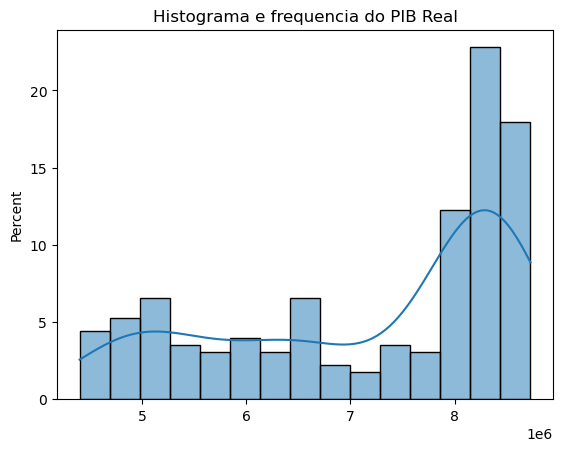

In [36]:
#Disposição dos histogramas com as distribuições, desconsiderando o ipca acumulado por ser uma variável acumulada
print(freq_pibr, "\n")

k = round(np.sqrt(pd.Series.count(pibr)))
sns.histplot(x=pibr,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia do PIB Real")

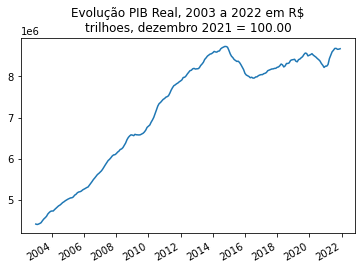

In [21]:
fig, ax = plt.subplots()

ax.plot(data,pibr[0:228], linewidth = 1.5)
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
title = ax.set_title("\n".join(wrap("Evolução PIB Real, 2003 a 2022 em R$ trilhoes, dezembro 2021 = 100.00", 40)))

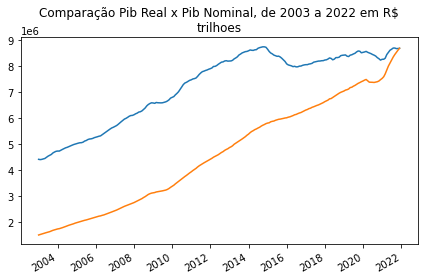

In [22]:
fig, ax = plt.subplots()

ax.plot(data,pibr[0:228], linewidth = 1.5)
ax.plot(data,pib[0:228], linewidth = 1.5)
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title("\n".join(wrap("Comparação Pib Real x Pib Nominal, de 2003 a 2022 em R$ trilhoes", 60)))
fig.tight_layout()

In [23]:
pibr_desc = pibr.describe() # Por ser uma função, não houve forma de traduzir as variáveis.
gmean_pibr = "Média geométrica: " + str(round(statistics.geometric_mean(pibr),2))
median_pibr = "Mediana: " + str(statistics.median(pibr))
var_pibr = "Variancia: " + str(statistics.variance(pibr))
ermed_pibr = "Erro Padrão da Média: " + str(stats.mstats.sem(pibr))
assim_pibr = "Assimetria: " + str(stats.skew(pibr)) # onde se concentra o peso maior da distribuição

# Teste de JARQUE-BERA, usando função de resposta para o resultado do teste.

print(gmean_pibr + "\n" + median_pibr + "\n" + ermed_pibr + "\n" + var_pibr + "\n" + assim_pibr)
print("\n")

# Apresentando os resultados obtidos
round(pibr_desc,2)

Média geométrica: 7055867.57
Mediana: 7976591.65
Erro Padrão da Média: 92073.55477952678
Variancia: 1932879003660.3823
Assimetria: -0.6758867438009087




count        228.00
mean     7205619.68
std      1390280.19
min      4397153.95
25%      6052016.95
50%      7976591.65
75%      8357673.02
max      8729655.25
dtype: float64

In [24]:
curtose_pibr = stats.kurtosis(pibr) #plotável, mas optei por não poluir mais o código
base = 3
if curtose_pibr == base :
    print("Curtose = %.3f," % curtose_pibr + " Mesocurtica – A distribuiçao de frequências e a propria distribuição normal")
elif curtose_pib > 3 :
    print("Curtose = %.3f," % curtose_pibr + " Leptocurtica – A distribuiçao é concentrada em torno da média (alta homogeneidade)")
else:
    print("Curtose = %.3f," % curtose_pibr + " Platicurtica – A distribuiçao é achatada (alta variabilidade)")

print("\n")

# Teste de JARQUE-BERA, usando função de resposta para o resultado do teste.
# Teste de normalidade dos dados
print("Teste de Jarque-Bera")
stat, p = stats.jarque_bera(pibr)
print('Estatistica = %.3f, p-valor = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
else:
    print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")

print("\n"+"Teste de Shapiro")
stat,p = stats.shapiro(pibr)

print('Estatistica = %.3f, p-valor = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
else:
    print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")

Curtose = -1.068, Platicurtica – A distribuiçao é achatada (alta variabilidade)


Teste de Jarque-Bera
Estatistica = 28.190, p-valor = 0.000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.848, p-valor = 0.000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


Text(0.5, 0.98, 'Decomposição do PIB')

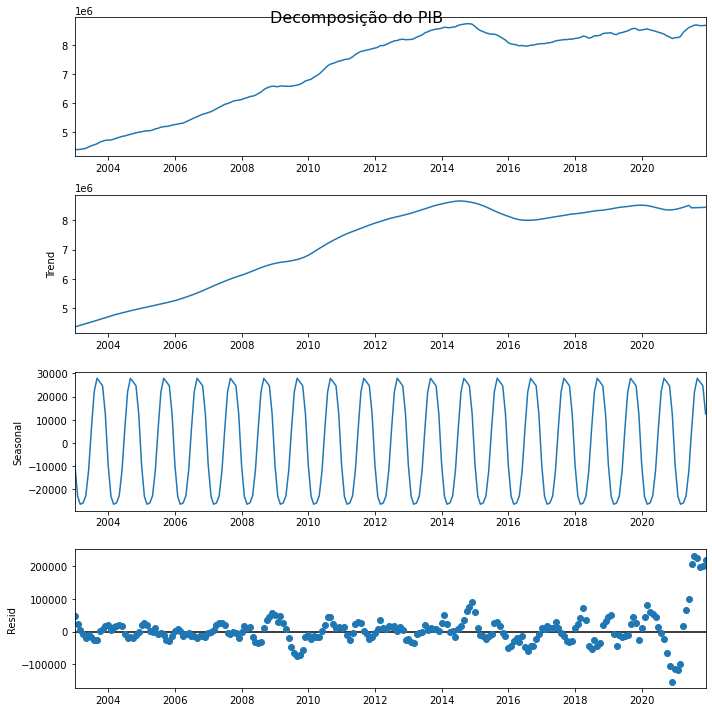

In [25]:
# Additive Decomposition, baseada no link time-series-analysis
pib_dec = seasonal_decompose(pibr, model='additive', extrapolate_trend="freq")

# Plotando a decomposição
plt.rcParams.update({'figure.figsize': (10,10)})
pib_dec.plot().suptitle('Decomposição do PIB', fontsize=16)

In [35]:
#construção do df com os valores da decomposição
plt.rcdefaults()

pib_dec_df = pd.concat([pib_dec.seasonal, pib_dec.trend, pib_dec.resid, pib_dec.observed], axis=1)
pib_dec_df.columns = ['seas', 'trend', 'resid', 'actual_values']
pib_dec_df

,seas,trend,resid,actual_values
Data,,,,
2003-01-01,-9421.411923,4.369316e+06,47882.954780,4407777.81
2003-02-01,-23002.627547,4.397746e+06,22410.672719,4397153.95
2003-03-01,-26351.018609,4.426176e+06,5839.026096,4405663.55
2003-04-01,-25832.605812,4.454605e+06,-7158.884386,4421613.69
2003-05-01,-22787.731501,4.483035e+06,-19071.706382,4441175.38
...,...,...,...,...
2021-08-01,22029.255471,8.428065e+06,231688.297455,8681782.11
2021-09-01,27868.680944,8.431628e+06,223063.306375,8682559.62
2021-10-01,26316.871043,8.435191e+06,198182.410668,8659689.99


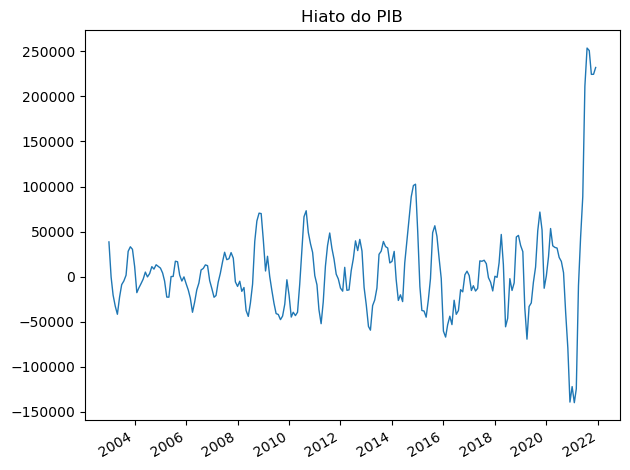

In [33]:
#Hiato do PIB
pibh = pibr - pib_dec.trend

fig, ax = plt.subplots()

ax.plot(data,pibh, linewidth = 1.0)
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title("\n".join(wrap("Hiato do PIB", 60)))
fig.tight_layout()